In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape
# rows=768,cols=9

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
a = df['Outcome'].value_counts()
a

0    500
1    268
Name: Outcome, dtype: int64

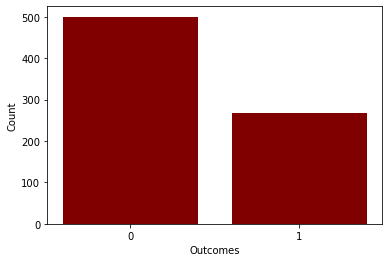

In [13]:
plt.bar(a.index,a,color='maroon')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.xticks(a.index)
plt.show()

In [14]:
x = df.drop('Outcome',axis=1)  # 
y = df['Outcome']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(768, 8)
(768,)


In [15]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [21]:
print(x.shape)
print(768*0.25)

(768, 8)
192.0


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### 1) Log Reg

In [35]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
# accuracy
mscore(m1) 

Training Score 0.7829861111111112
Testing Score 0.7604166666666666


In [37]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1]


In [38]:
eval_model(y_test,ypred_m1)

[[110  18]
 [ 28  36]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       128
           1       0.67      0.56      0.61        64

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



#### 2) KNN Classifier

In [63]:
m2 = KNeighborsClassifier(n_neighbors=9)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [64]:
mscore(m2)

Training Score 0.7899305555555556
Testing Score 0.7760416666666666


In [65]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1]


In [66]:
eval_model(y_test,ypred_m2)

[[114  14]
 [ 29  35]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       128
           1       0.71      0.55      0.62        64

    accuracy                           0.78       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



#### 3) SVC

In [70]:
m3 = SVC(kernel='linear',C=10)
m3.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [68]:
mscore(m3)

Training Score 0.7795138888888888
Testing Score 0.7604166666666666


In [69]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1]


In [ ]:
eval_model(y_test,ypred_m3)

#### 4) DT Classifier

In [115]:
m4 = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=25)
m4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=25)

In [114]:
mscore(m4)

Training Score 0.8628472222222222
Testing Score 0.734375


In [116]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1]


In [112]:
eval_model(y_test,ypred_m4)

[[109  19]
 [ 29  35]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       128
           1       0.65      0.55      0.59        64

    accuracy                           0.75       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



In [117]:
fn = x_train.columns  # feature_names
cn = ['0','1']        # class names
print(fn)
print(cn)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
['0', '1']


In [118]:
from sklearn.tree import plot_tree,export_text

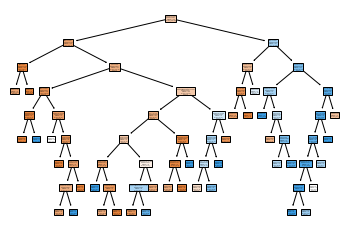

In [119]:
plot_tree(m4,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [126]:
export_text(m4,show_weights=True,spacing=10)

'|---------- feature_1 <= 129.50\n|          |---------- feature_5 <= 26.45\n|          |          |---------- feature_5 <= 9.10\n|          |          |          |---------- weights: [7.00, 2.00] class: 0\n|          |          |---------- feature_5 >  9.10\n|          |          |          |---------- weights: [93.00, 0.00] class: 0\n|          |---------- feature_5 >  26.45\n|          |          |---------- feature_7 <= 26.50\n|          |          |          |---------- feature_5 <= 30.95\n|          |          |          |          |---------- feature_0 <= 7.00\n|          |          |          |          |          |---------- weights: [38.00, 0.00] class: 0\n|          |          |          |          |---------- feature_0 >  7.00\n|          |          |          |          |          |---------- weights: [0.00, 1.00] class: 1\n|          |          |          |---------- feature_5 >  30.95\n|          |          |          |          |---------- feature_2 <= 54.00\n|         

#### 5) RF Classifier

In [180]:
m5 = RandomForestClassifier(n_estimators=130,criterion='entropy',min_samples_split=15,max_depth=8)
m5.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=15,
                       n_estimators=130)

In [182]:
mscore(m5)

Training Score 0.8888888888888888
Testing Score 0.7760416666666666


In [183]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

[0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1]


In [184]:
eval_model(y_test,ypred_m5)

[[115  13]
 [ 30  34]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.72      0.53      0.61        64

    accuracy                           0.78       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.77      0.78      0.77       192



#### KNN and RandomForest generates the best results